In [15]:
# Import libraries. You may or may not use all of these.
!pip install -q git+https://github.com/tensorflow/docs
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling

  Preparing metadata (setup.py) ... done
Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.


In [16]:
# Import data
!wget https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
dataset = pd.read_csv('insurance.csv')
print(dataset)

--2023-12-26 01:08:51--  https://cdn.freecodecamp.org/project-data/health-costs/insurance.csv
Resolving cdn.freecodecamp.org (cdn.freecodecamp.org)... 104.26.3.33, 172.67.70.149, 104.26.2.33, ...
Connecting to cdn.freecodecamp.org (cdn.freecodecamp.org)|104.26.3.33|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 50264 (49K) [text/csv]
Saving to: ‘insurance.csv.2’

insurance.csv.2     100%[===================>]  49.09K  --.-KB/s    in 0s      

2023-12-26 01:08:51 (117 MB/s) - ‘insurance.csv.2’ saved [50264/50264]

      age     sex   bmi  children smoker     region  expenses
0      19  female  27.9         0    yes  southwest  16884.92
1      18    male  33.8         1     no  southeast   1725.55
2      28    male  33.0         3     no  southeast   4449.46
3      33    male  22.7         0     no  northwest  21984.47
4      32    male  28.9         0     no  northwest   3866.86
...   ...     ...   ...       ...    ...        ...       ...
1333   50    male  3

In [17]:
# Make sure to convert categorical data to numbers.
sex_mapping = {'male': 0, 'female': 1}
smoker_mapping = {'no': 0, 'yes': 1}
region_mapping = {'northeast': 0, 'southeast': 1, 'southwest': 2, 'northwest': 3}

dataset['sex'] = dataset['sex'].map(sex_mapping)
dataset['smoker'] = dataset['smoker'].map(smoker_mapping)
dataset['region'] = dataset['region'].map(region_mapping)
print(dataset)

      age  sex   bmi  children  smoker  region  expenses
0      19    1  27.9         0       1       2  16884.92
1      18    0  33.8         1       0       1   1725.55
2      28    0  33.0         3       0       1   4449.46
3      33    0  22.7         0       0       3  21984.47
4      32    0  28.9         0       0       3   3866.86
...   ...  ...   ...       ...     ...     ...       ...
1333   50    0  31.0         3       0       3  10600.55
1334   18    1  31.9         0       0       0   2205.98
1335   18    1  36.9         0       0       1   1629.83
1336   21    1  25.8         0       0       2   2007.95
1337   61    1  29.1         0       1       3  29141.36

[1338 rows x 7 columns]


In [18]:
# Use 80% of the data as the train_dataset and 20% of the data as the test_dataset.
# Calculate the length of the DataFrame
total_length = len(dataset)

# Calculate the index to split the data (80%)
split_index = int(0.8 * total_length)

# Split the DataFrame into 80% and 20%
train_dataset = dataset.iloc[:split_index]  # First 80% of the data
test_dataset = dataset.iloc[split_index:]  # Remaining 20% of the data

# Display the two portions of the data
print("Train Data (80%):")
print(train_dataset)

print("\nRemaining Data (20%):")
print(test_dataset)

Train Data (80%):
      age  sex   bmi  children  smoker  region  expenses
0      19    1  27.9         0       1       2  16884.92
1      18    0  33.8         1       0       1   1725.55
2      28    0  33.0         3       0       1   4449.46
3      33    0  22.7         0       0       3  21984.47
4      32    0  28.9         0       0       3   3866.86
...   ...  ...   ...       ...     ...     ...       ...
1065   42    1  25.3         1       0       2   7045.50
1066   48    0  37.3         2       0       1   8978.19
1067   39    0  42.7         0       0       0   5757.41
1068   63    0  21.7         1       0       3  14349.85
1069   54    1  31.9         1       0       1  10928.85

[1070 rows x 7 columns]

Remaining Data (20%):
      age  sex   bmi  children  smoker  region  expenses
1070   37    0  37.1         1       1       1  39871.70
1071   63    0  31.4         0       0       0  13974.46
1072   21    0  31.3         0       0       3   1909.53
1073   54    1  28.9  

In [19]:
# pop off the "expenses" column from these datasets to create new datasets called train_labels and test_labels. Use these labels when training your model.
train_labels = train_dataset.pop('expenses')
test_labels = test_dataset.pop('expenses')
print('printing train_labels: ')
print(train_labels)
print()
print('printing test_labels: ')
print(test_labels)

printing train_labels: 
0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1065     7045.50
1066     8978.19
1067     5757.41
1068    14349.85
1069    10928.85
Name: expenses, Length: 1070, dtype: float64

printing test_labels: 
1070    39871.70
1071    13974.46
1072     1909.53
1073    12096.65
1074    13204.29
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 268, dtype: float64


In [20]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(len(train_dataset.keys()),)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1)
])
model.compile(
    optimizer= tf.keras.optimizers.RMSprop(0.05),
    loss='mse',
    metrics=['mae', 'mse']
)
model.summary()


trained_model = model.fit(train_dataset, train_labels, epochs=200, verbose=1)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization_2 (Bat  (None, 6)                 24        
 chNormalization)                                                
                                                                 
 dense_6 (Dense)             (None, 64)                448       
                                                                 
 dense_7 (Dense)             (None, 64)                4160      
                                                                 
 dense_8 (Dense)             (None, 1)                 65        
                                                                 
Total params: 4697 (18.35 KB)
Trainable params: 4685 (18.30 KB)
Non-trainable params: 12 (48.00 Byte)
_________________________________________________________________
Epoch 1/200
34/34 [==============================] - 2s 4ms/step - loss: 96643760.00

9/9 - 1s - loss: 23793992.0000 - mae: 3295.0229 - mse: 23793992.0000 - 585ms/epoch - 65ms/step
Testing set Mean Abs Error: 3295.02 expenses
You passed the challenge. Great job!
9/9 [==============================] - 0s 2ms/step


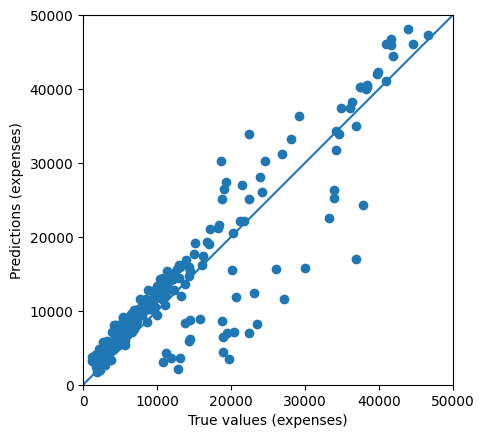

In [21]:
# RUN THIS CELL TO TEST YOUR MODEL. DO NOT MODIFY CONTENTS.
# Test model by checking how well the model generalizes using the test set.
loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=2)

print("Testing set Mean Abs Error: {:5.2f} expenses".format(mae))

if mae < 3500:
  print("You passed the challenge. Great job!")
else:
  print("The Mean Abs Error must be less than 3500. Keep trying.")

# Plot predictions.
test_predictions = model.predict(test_dataset).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True values (expenses)')
plt.ylabel('Predictions (expenses)')
lims = [0, 50000]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims,lims)
